In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [17]:
df= pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [40]:
1. GenHlth
2. Age
3. BMI
4. Education
5. CholCheck
6. Income
7. AnyHealthcare
8. HighBP
9. Veggies
10. HighChol

SyntaxError: invalid syntax (282990813.py, line 1)

## How these Variables affact the HeartDiseaseorAttack under different level of age

In [18]:
def odds_trend_Age(feature,dataframe):
    df = dataframe.copy()
    table = pd.crosstab(df['Age'], [df[feature], df['HeartDiseaseorAttack']], margins=False)
    age = np.arange(1, 14)
    # Create a color map that maps each feature to a unique color
    color_map = plt.get_cmap('plasma')
    plt.figure(figsize=(8,6))
    # Loop over each level of GenHlth and plot the data for that level
    for i, level in enumerate(sorted(df_copy[feature].unique())):
        temp = table.loc[:,level][1] / table.loc[:,level][0] 
        # Create the data for the dot plot
        color = color_map(i / df[feature].unique().shape[0])
        plt.scatter(age, temp.values, marker='o', color=color, label=level)

    # Add a legend to the plot
    plt.legend(bbox_to_anchor=(1.25, 1))
    # Add labels and title
    plt.xlabel('Age')
    plt.ylabel('Odds')
    plt.title('How '+ feature + ' affact the HeartDiseaseorAttack under different level of age')
    # Display the plot
    plt.show()
    

In [19]:
def odds_trend_Age(feature, dataframe):
    df = dataframe.copy()
    table = pd.crosstab(df['Age'], [df[feature], df['HeartDiseaseorAttack']], margins=False)
    age = np.arange(1, 14)
    # Create a color map that maps each feature to a unique color
    color_map = plt.get_cmap('plasma')
    
    # Create subplots with shared y-axis
    fig, ax = plt.subplots(figsize=(8, 6), sharey=True)
    
    # Loop over each level of the feature and plot the data for that level
    for i, level in enumerate(sorted(df[feature].unique())):
        temp = table.loc[:, level][1] / table.loc[:, level][0]
        # Create the data for the dot plot
        color = color_map(i / df[feature].unique().shape[0])
        ax.scatter(age, temp.values, marker='o', color=color, label=level)

    # Add a legend to the plot
    ax.legend(bbox_to_anchor=(1.25, 1))
    # Add labels and title
    ax.set_xlabel('Age')
    ax.set_ylabel('Odds')
    ax.set_title('How ' + feature + ' affects HeartDiseaseorAttack under different levels of age')

    # Display the plot
    plt.show()


### set a range for BMI as categorical 

In [20]:
# Define the bin edges for the BMI categories
bin_edges = [0,18.5, 24.9, 29.9, float('inf')]
df_copy = df.copy()
# Use pd.cut() to make the age variable categorical
df_copy['BMI'] = pd.cut(df_copy['BMI'], bins=bin_edges)
df_copy

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,"(29.9, inf]",1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,"(24.9, 29.9]",1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,"(24.9, 29.9]",0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,"(24.9, 29.9]",0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,"(18.5, 24.9]",0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,"(29.9, inf]",0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,"(0.0, 18.5]",0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,"(24.9, 29.9]",0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,"(18.5, 24.9]",0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


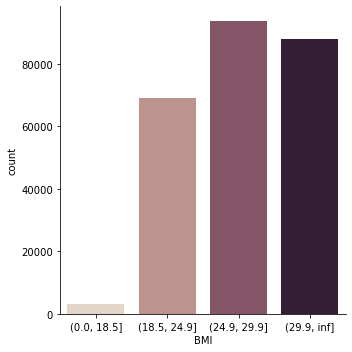

In [143]:
sns.catplot(data=df_copy, x="BMI", kind="count", palette="ch:.25")

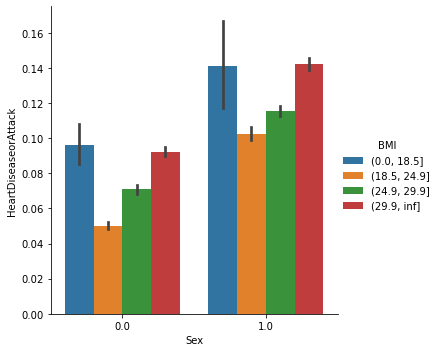

In [144]:
sns.catplot(data=df_copy, x="Sex", y="HeartDiseaseorAttack", hue="BMI", kind="bar")

In [ ]:
(
    ggplot(df, aes(x='variable', y='value', fill='category'))
    + geom_bar(stat='identity', position='dodge')
)

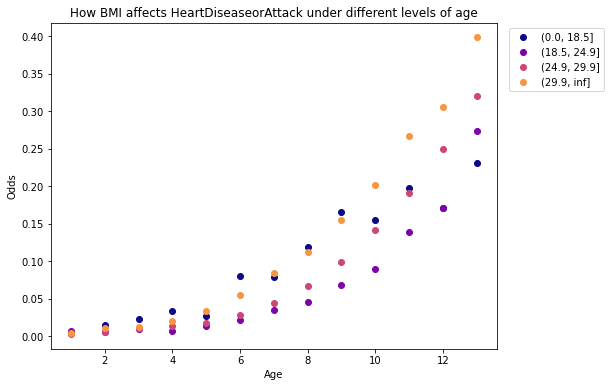

In [5]:
odds_trend_Age('BMI',df_copy)

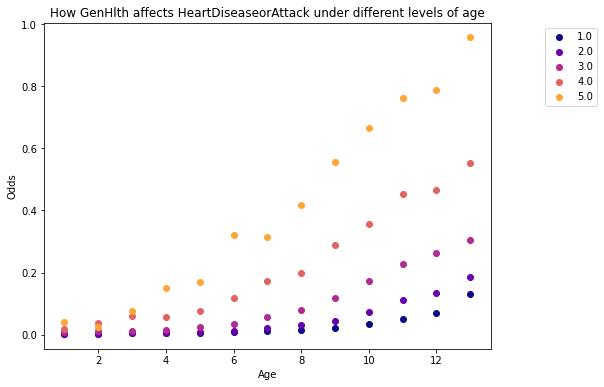

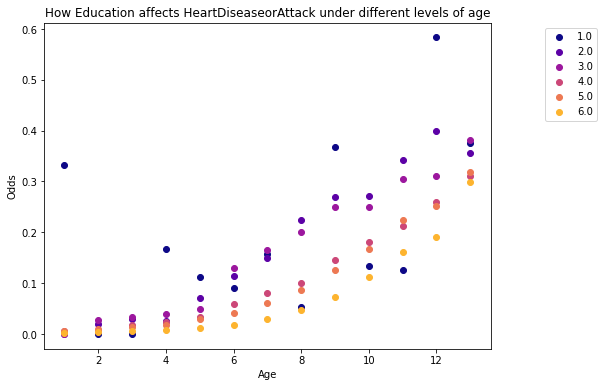

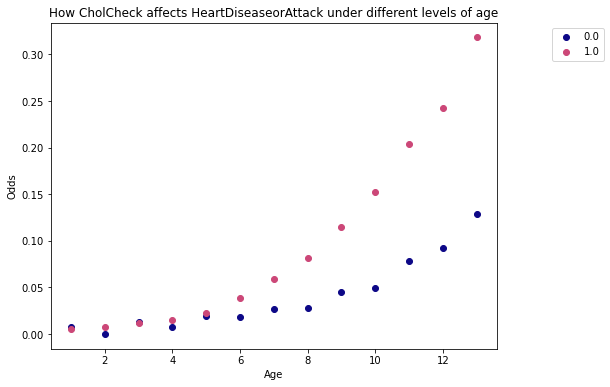

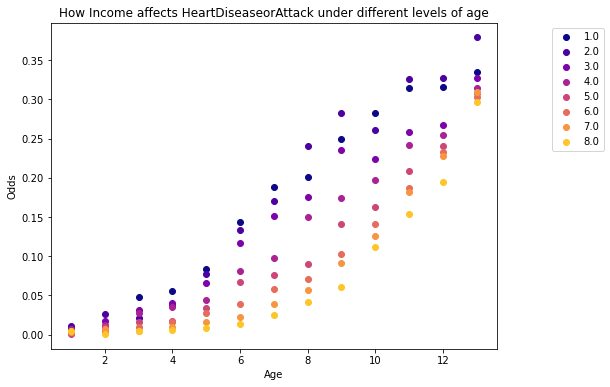

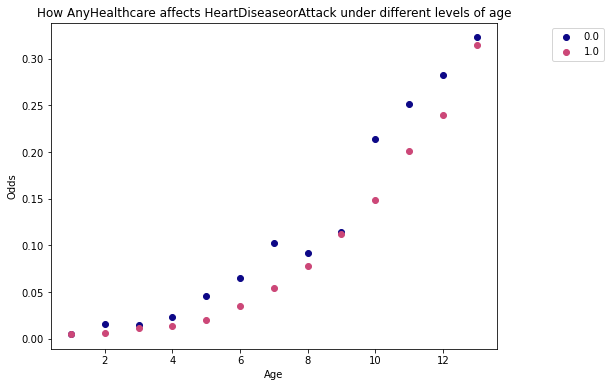

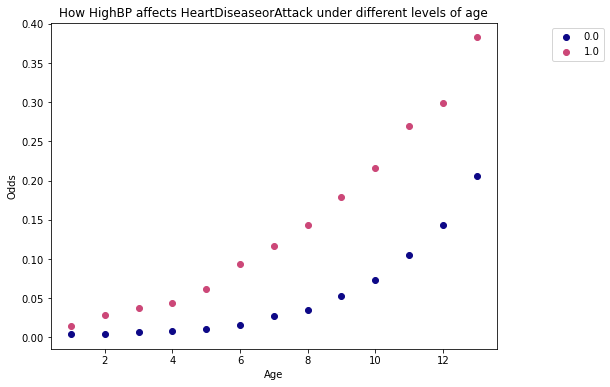

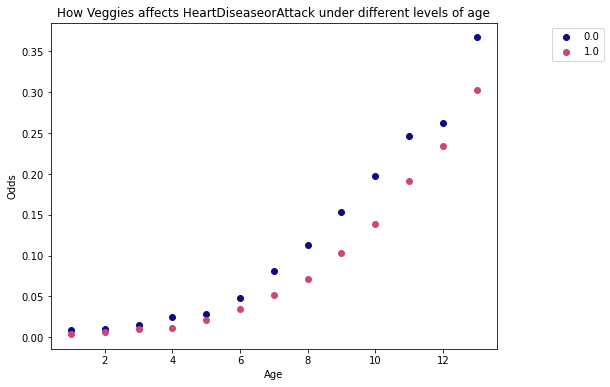

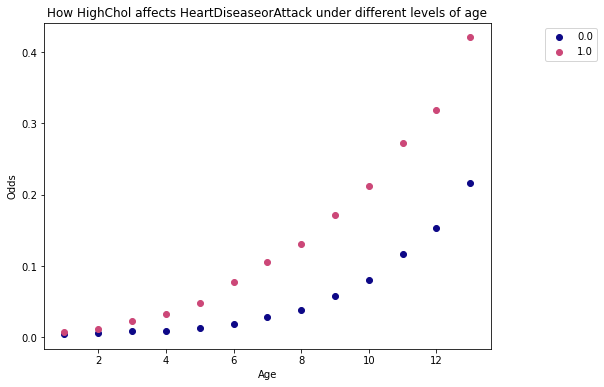

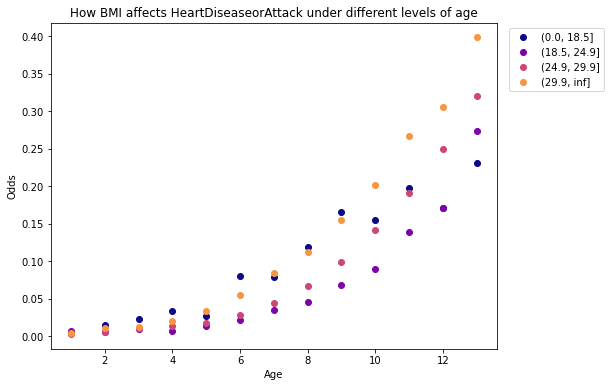

In [6]:
low_entropy_var = ['GenHlth','Education','CholCheck','Income','AnyHealthcare','HighBP','Veggies','HighChol','BMI']
for feature in low_entropy_var:
    odds_trend_Age(feature,df_copy)

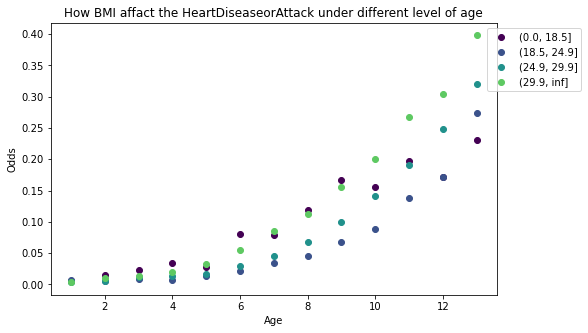

In [44]:
df = df_copy.copy()
table = pd.crosstab(df['Age'], [df['BMI'], df['HeartDiseaseorAttack']], margins=False)
age = np.arange(1, 14)
# Create a color map that maps each feature to a unique color
color_map = plt.get_cmap('viridis')

plt.figure(figsize=(8,5))
# Loop over each level of GenHlth and plot the data for that level
for i, level in enumerate(sorted(df['BMI'].unique())):
    temp = table.loc[:,level][1] / table.loc[:,level][0] 
    # Create the data for the dot plot
    color = color_map(i / df['BMI'].unique().shape[0])
    plt.scatter(age, temp.values, marker='o', color=color, label=level)

# Add a legend to the plot
plt.legend()
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Odds')
plt.legend(bbox_to_anchor=(1.2, 1))
plt.title('How '+ feature +' affact the HeartDiseaseorAttack under different level of age')
# Display the plot
plt.show()


### Group by Gender 

In [33]:
df= pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [57]:
df_copy = df.copy()

# define the bin edges and labels
bins = [0, 18.5, 24.9, 29.9, float("inf")]
labels = [1, 2, 3, 4]

menbins = [0, 1, 7, 14, 21, float('inf')]
menlabs = [0, 1, 2, 3, 4]

phybins = [0, 1, 7, 14, 21, float('inf')]
phylabs = [0, 1, 2, 3, 4]

# categorize the BMI column into 4 levels
df_copy["BMI"] = pd.cut(df_copy["BMI"], bins=bins, labels=labels)
df_copy["MentHlth"] = pd.cut(df_copy["MentHlth"], bins=menbins, labels=menlabs, include_lowest=True)
df_copy["PhysHlth"] = pd.cut(df_copy["PhysHlth"], bins=phybins, labels=phylabs, include_lowest=True)


df_copy.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,3,3,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0,0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,4,4,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0,0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1,0,0.0,0.0,11.0,5.0,4.0


In [58]:
df_copy

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,3,3,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0,0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,4,4,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0,0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1,0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,4,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0,1,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,1,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0,0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0,0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,2,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0,0,0.0,1.0,7.0,5.0,1.0


In [59]:
# group the data by gender
grouped = df_copy.groupby('Sex')

# create a new DataFrame for each group
male_df = grouped.get_group(1)
female_df = grouped.get_group(0)

In [81]:
def odds_trend_Age(feature, dataframe, ax):
    df = dataframe.copy()
    table = pd.crosstab(df['Age'], [df[feature], df['HeartDiseaseorAttack']], margins=False)
    age = np.arange(1, 14)
    # Create a color map that maps each feature to a unique color
    color_map = plt.get_cmap('plasma')
    
    # Loop over each level of GenHlth and plot the data for that level
    for i, level in enumerate(sorted(df[feature].unique())):
        temp = table.loc[:,level][1] / table.loc[:,level][0] 
        # Create the data for the dot plot
        color = color_map(i / df[feature].unique().shape[0])
        ax.scatter(age, temp.values, marker='o', color=color, label=level)

    # Add a legend to the plot
    ax.legend(bbox_to_anchor=(1.3, 1))
    # Add labels and title
    ax.set_xlabel('Age')
    ax.set_ylabel('Odds')
    ax.set_title( feature + ' affects HD under different levels of Age')

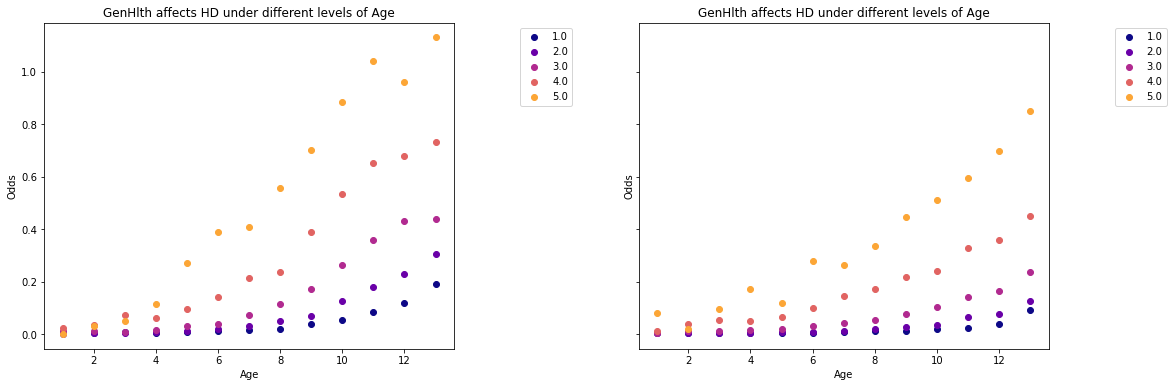

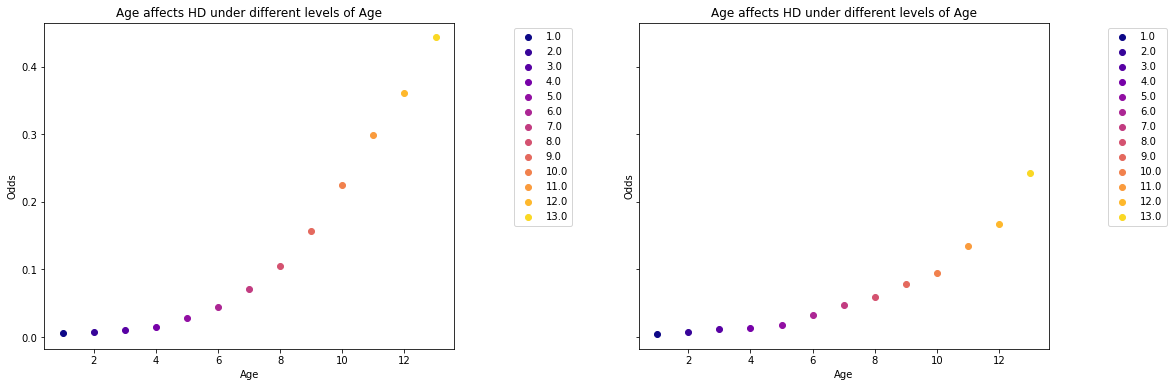

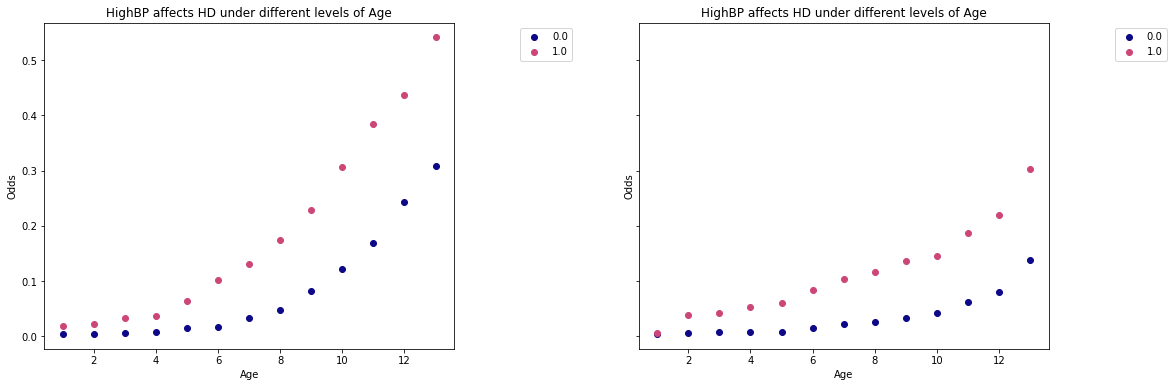

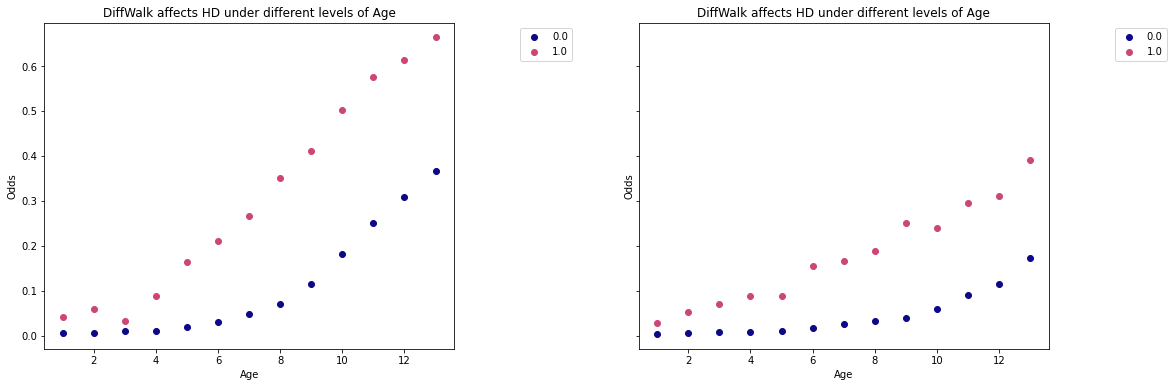

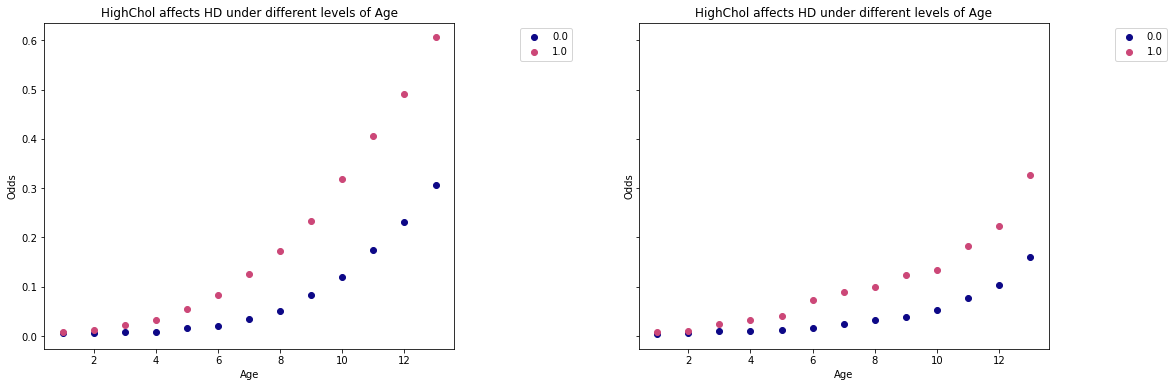

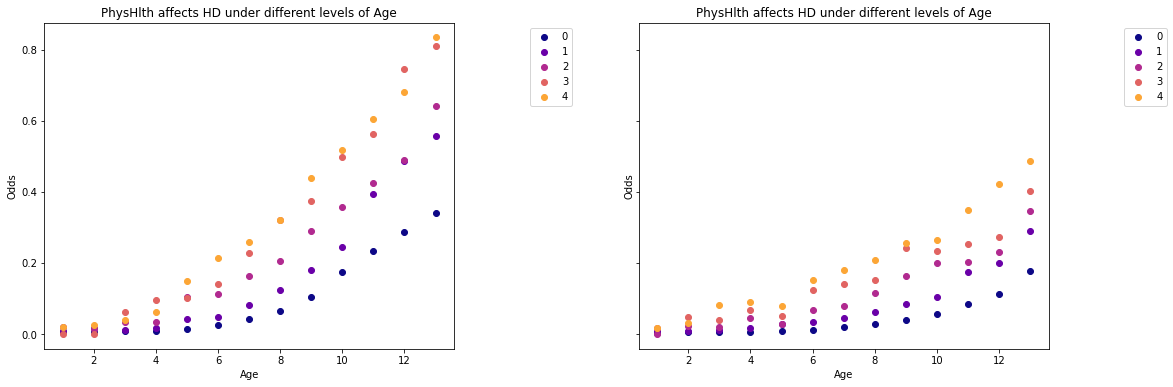

In [82]:
low_entropy_var = ['GenHlth','Age','HighBP','DiffWalk','HighChol','PhysHlth']
for feature in low_entropy_var:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.45}, sharey=True)
    # Call the function for each subplot
    odds_trend_Age(feature, male_df, ax1)
    odds_trend_Age(feature, female_df, ax2)

    # Adjust the overlap between the subplots
    plt.subplots_adjust(wspace=0.4)

    # Display the plots
    plt.show()

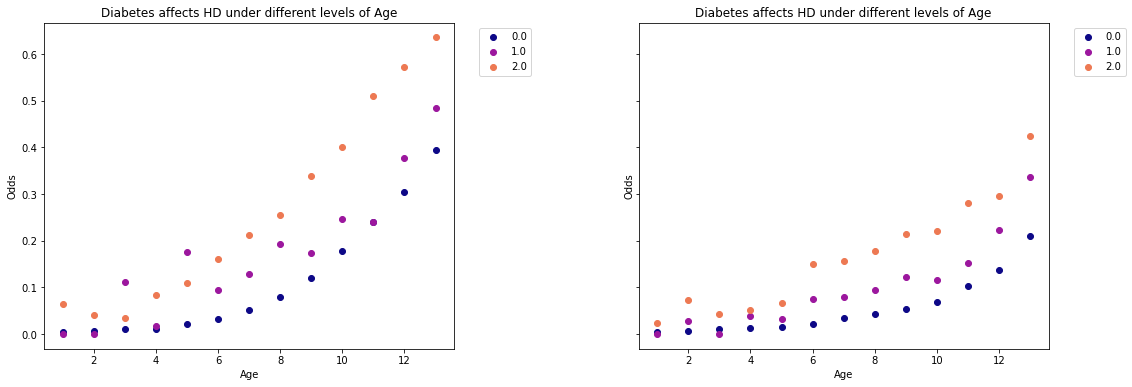

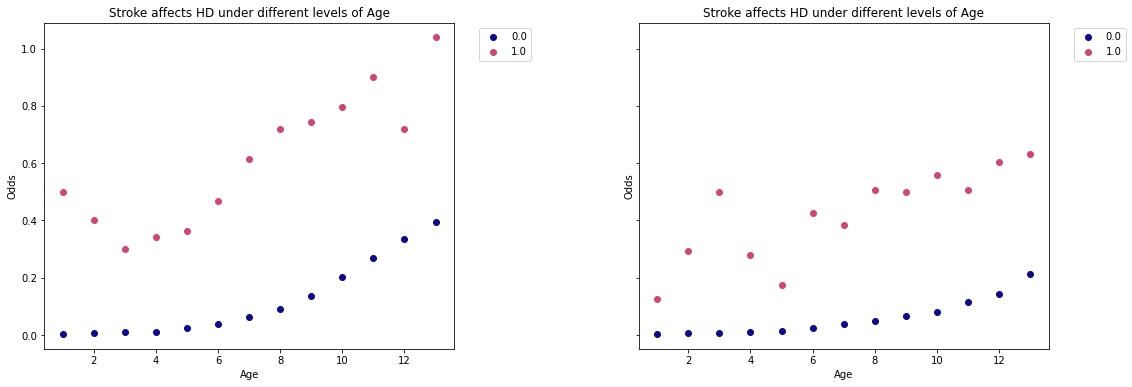

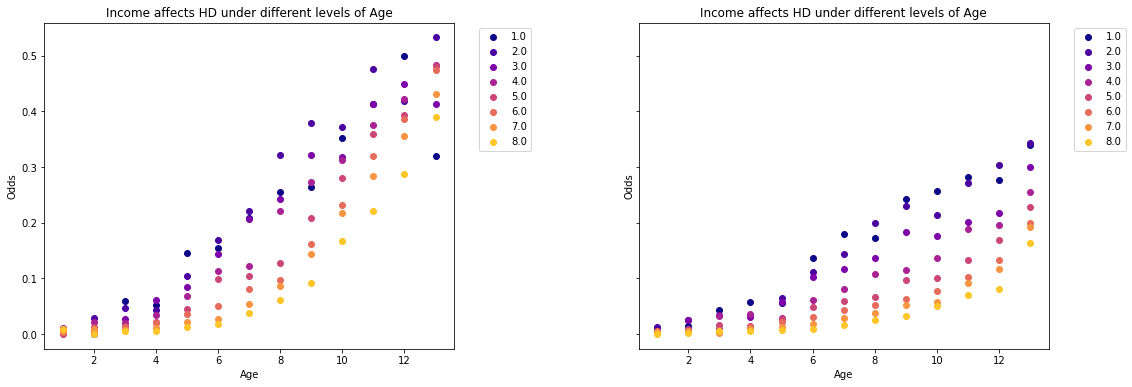

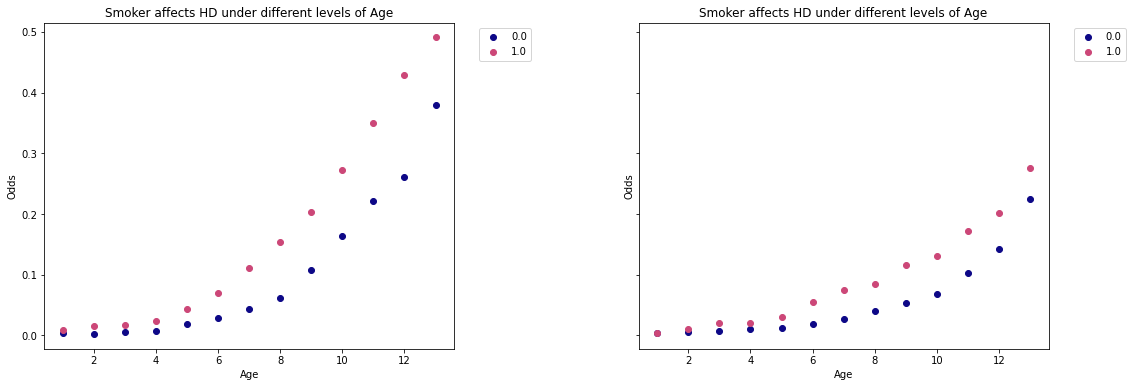

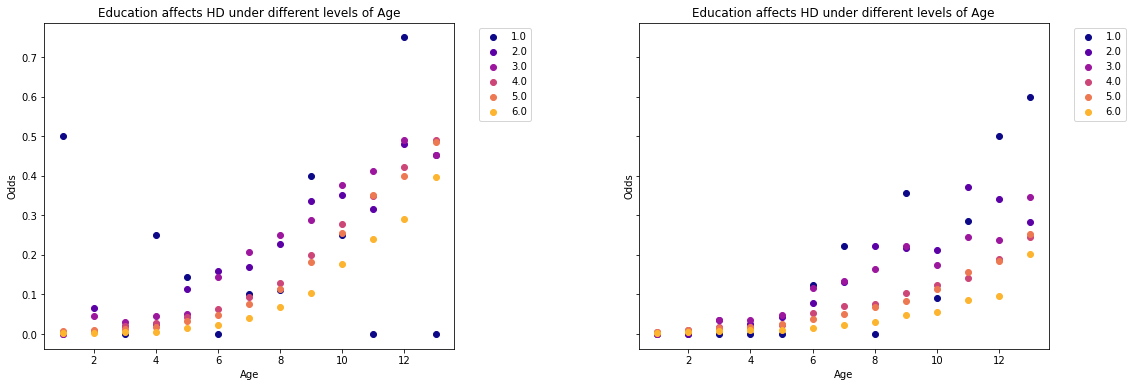

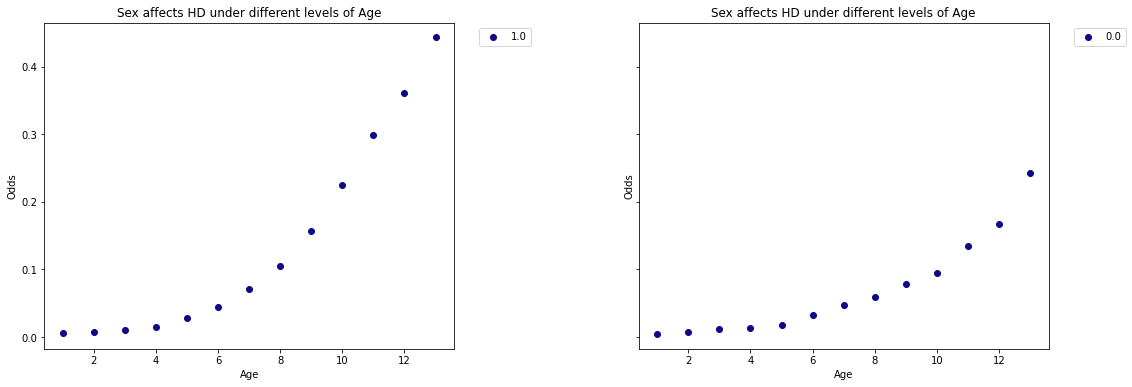

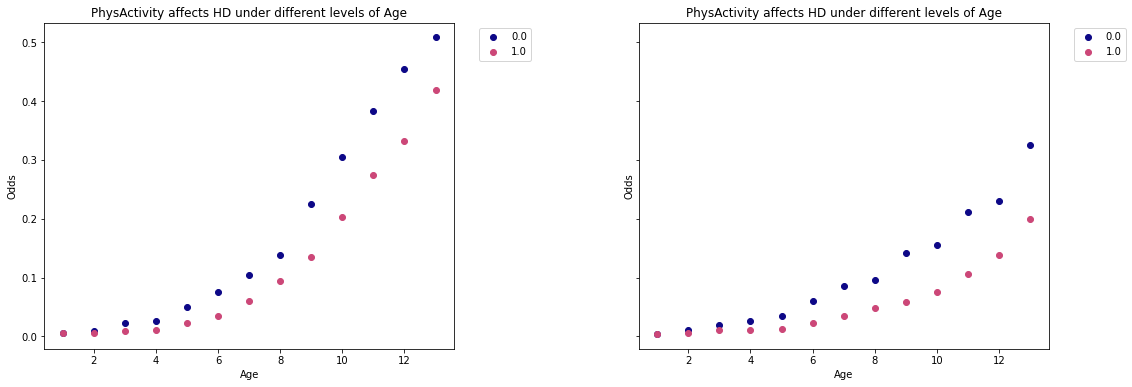

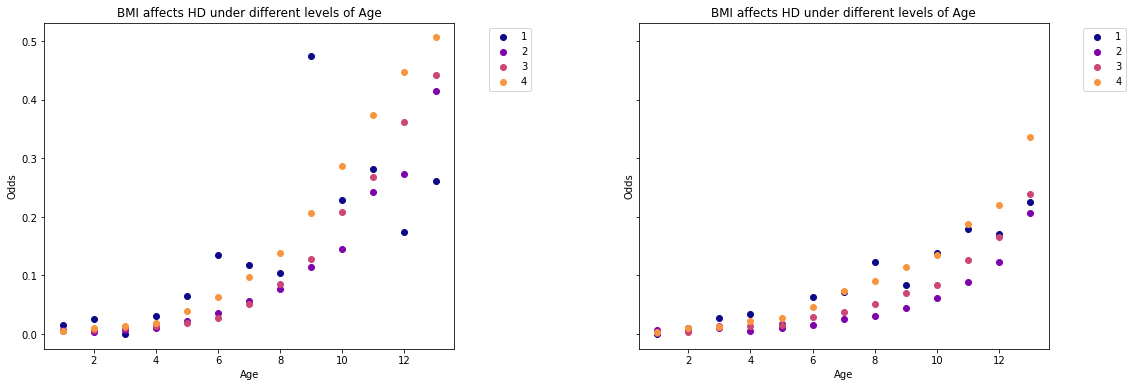

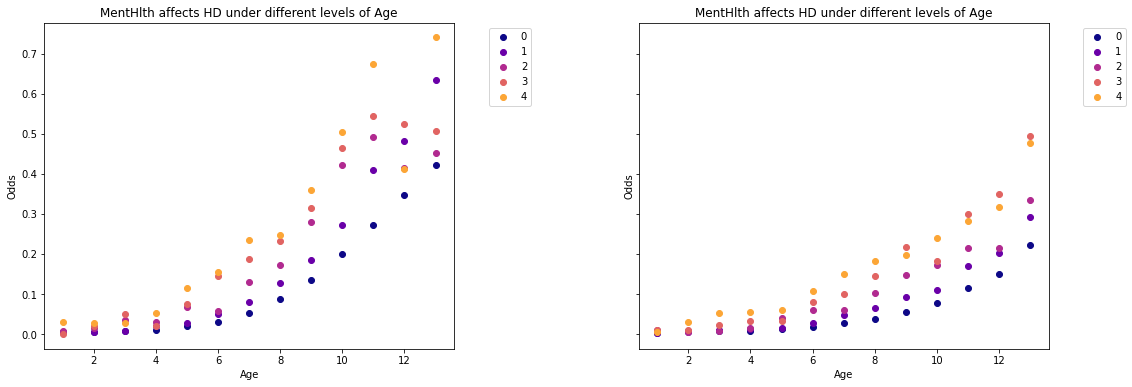

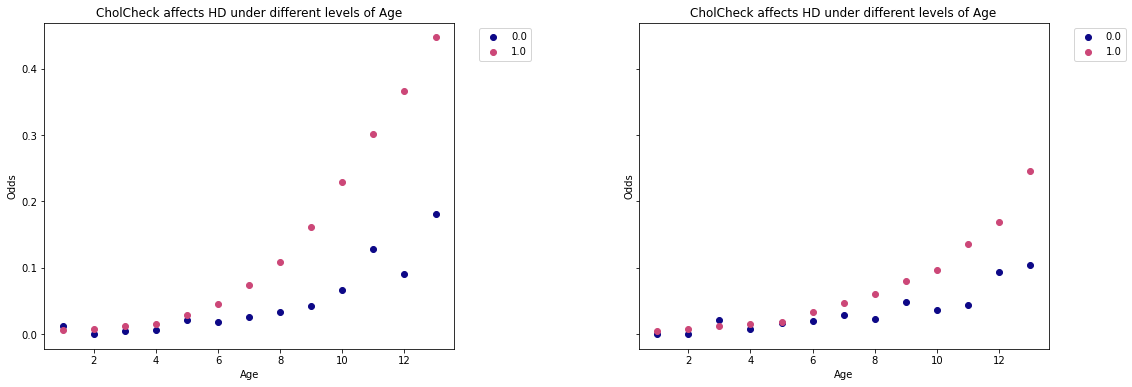

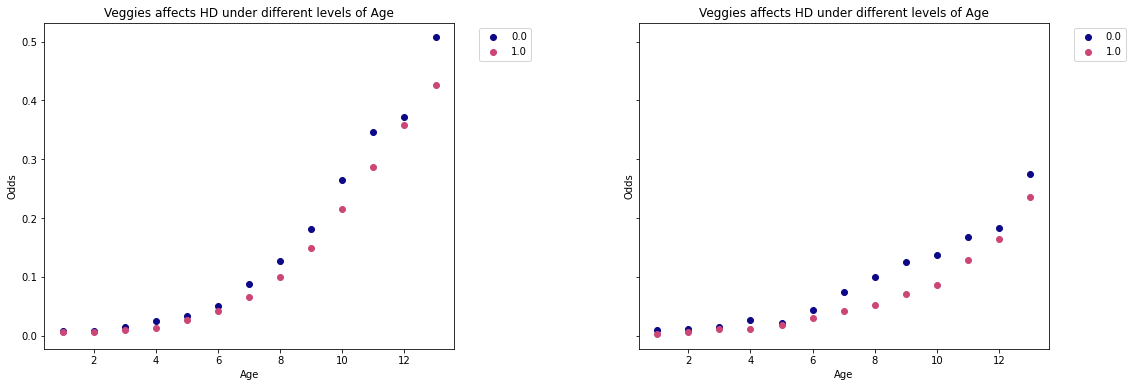

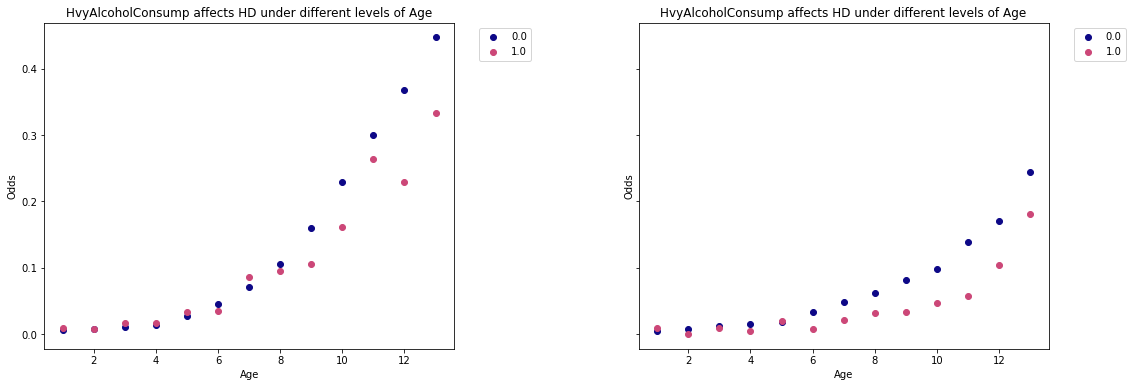

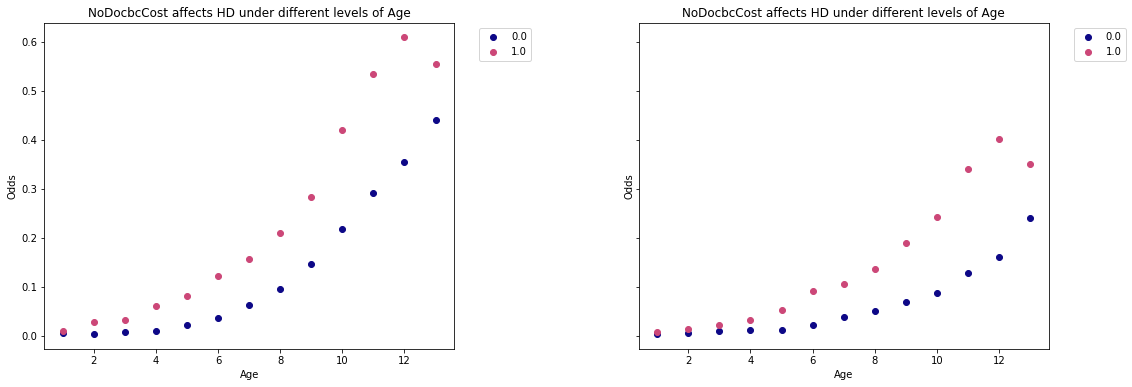

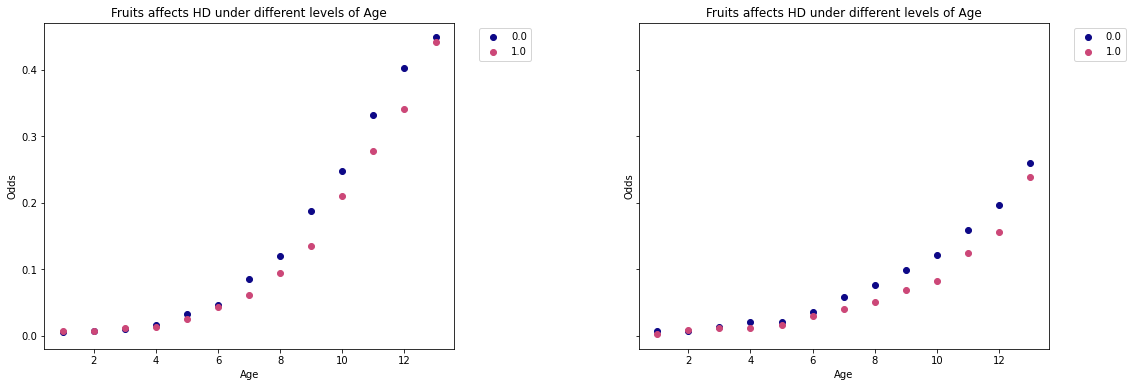

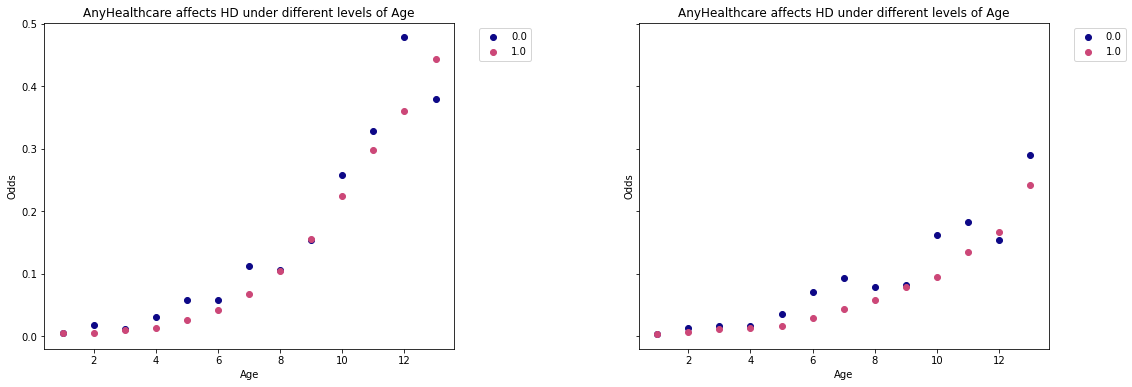

In [63]:
remain_entropy_var = ['Diabetes', 'Stroke','Income', 'Smoker', 'Education', 'Sex', 'PhysActivity', 'BMI', 'MentHlth', 'CholCheck',
'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'Fruits', 'AnyHealthcare']
for feature in remain_entropy_var:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.45}, sharey=True)
    # Call the function for each subplot
    odds_trend_Age(feature, male_df, ax1)
    odds_trend_Age(feature, female_df, ax2)

    # Adjust the overlap between the subplots
    plt.subplots_adjust(wspace=0.4)

    # Display the plots
    plt.show()

## Group by BMI

In [64]:
df_copy

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,3,3,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0,0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,4,4,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0,0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1,0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,4,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0,1,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,1,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0,0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0,0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,2,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0,0,0.0,1.0,7.0,5.0,1.0


In [65]:
# group the data by gender
grouped = df_copy.groupby('BMI')

# create a new DataFrame for each group
Underweight_df = grouped.get_group(1)
Normalweight_df = grouped.get_group(2)
Overweight_df = grouped.get_group(3)
Obesity_df = grouped.get_group(4)

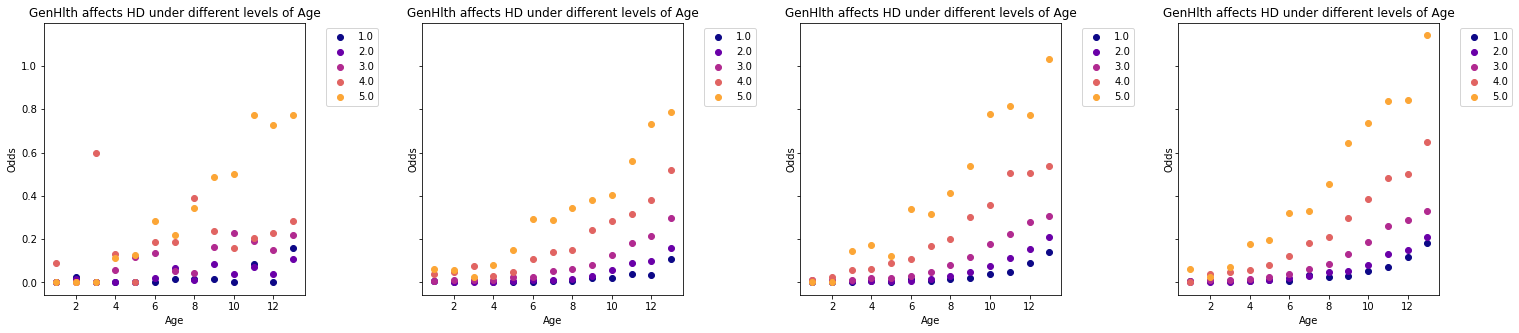

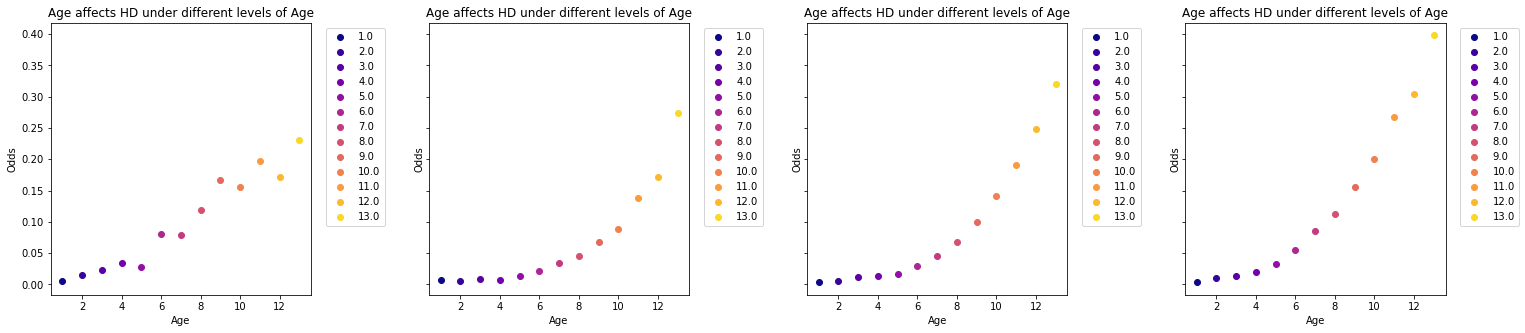

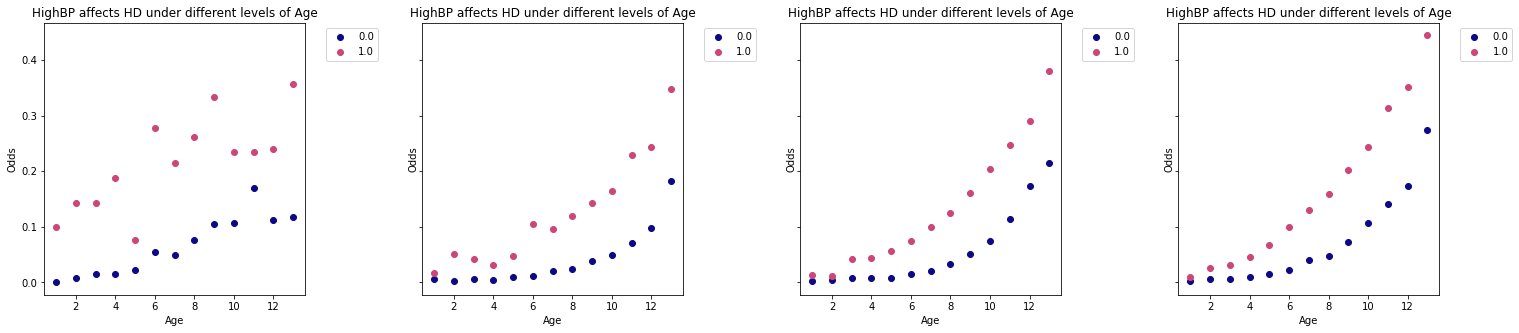

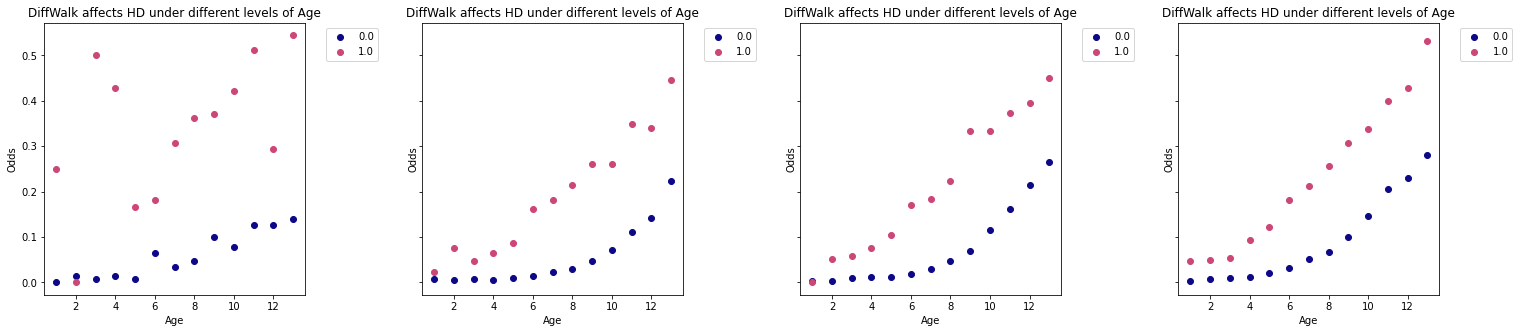

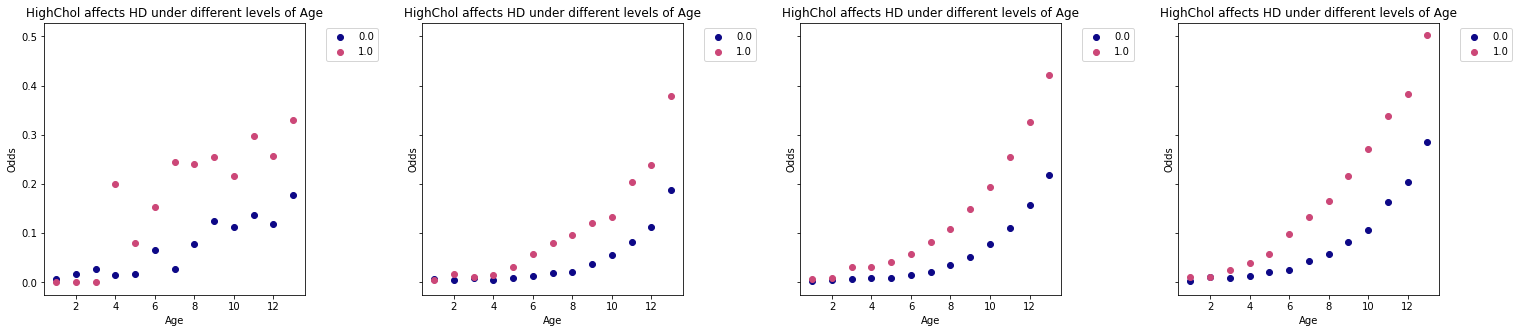

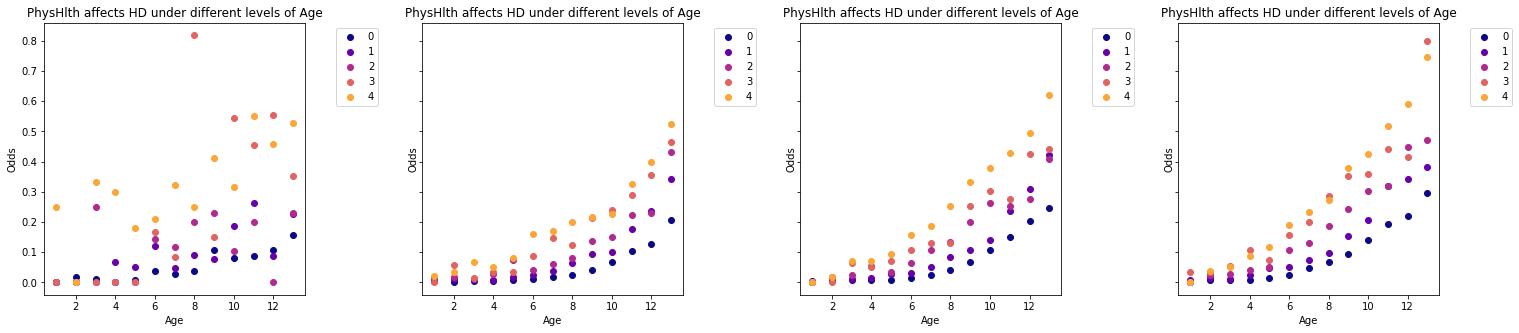

In [83]:
#low_entropy_var = ['GenHlth','Education','CholCheck','Income','AnyHealthcare','HighBP','Veggies','HighChol','DiffWalk','Age']
for feature in low_entropy_var:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 5), gridspec_kw={'wspace': 0.45, 'hspace': 0.45}, sharey=True)
    

    # Call the function for each subplot
    odds_trend_Age(feature, Underweight_df, ax1)
    odds_trend_Age(feature, Normalweight_df, ax2)
    odds_trend_Age(feature, Overweight_df, ax3)
    odds_trend_Age(feature, Obesity_df, ax4)

    # Adjust the overlap between the subplots
    plt.subplots_adjust(wspace=0.4)

    # Display the plots
    plt.show()




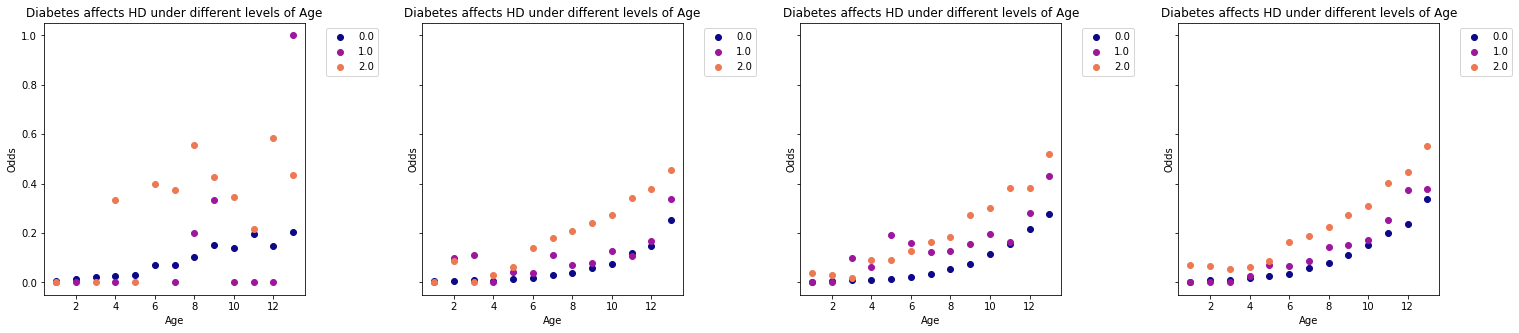

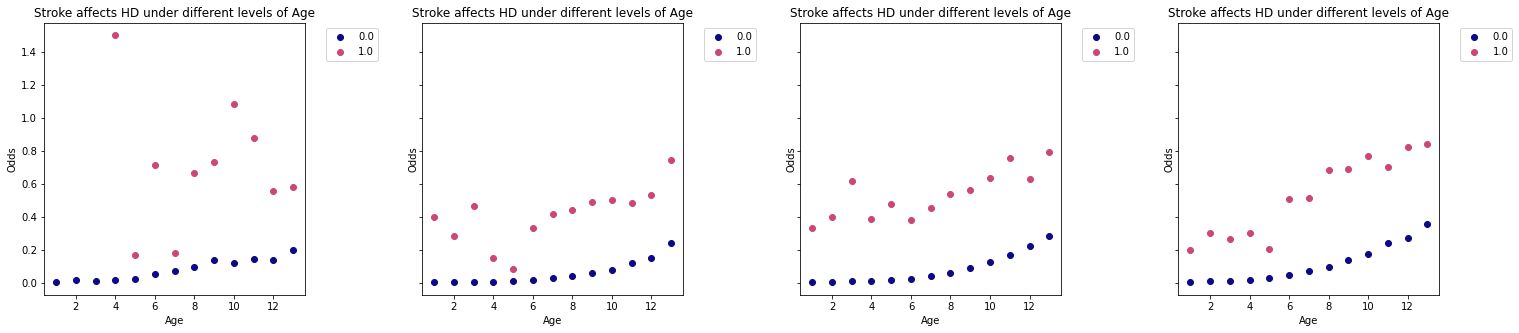

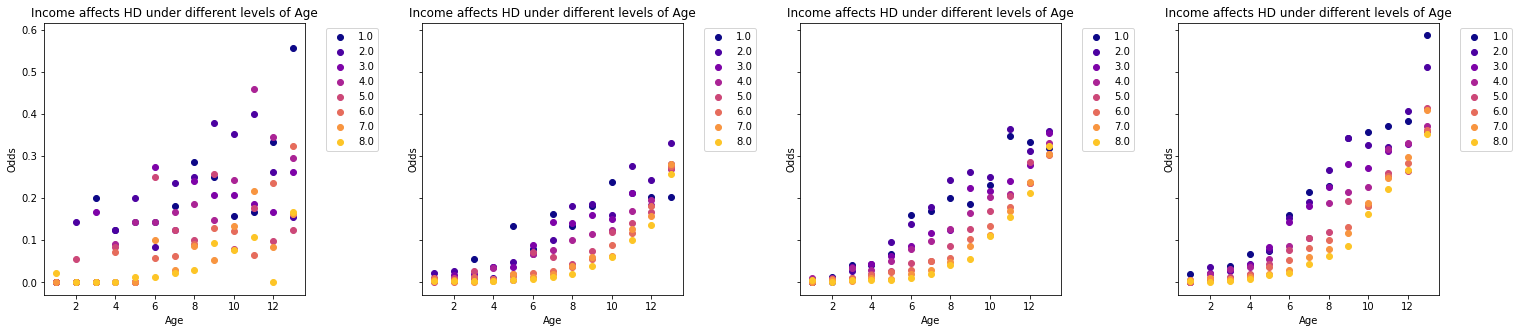

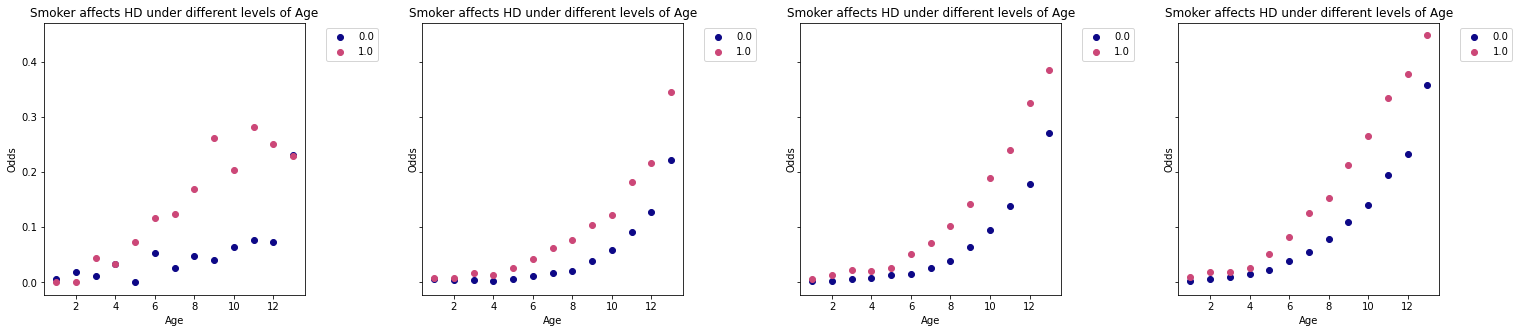

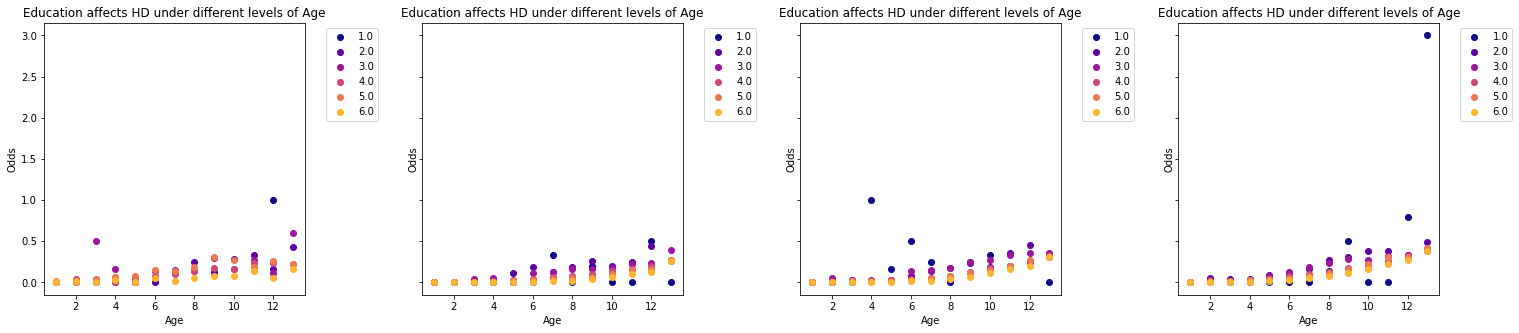

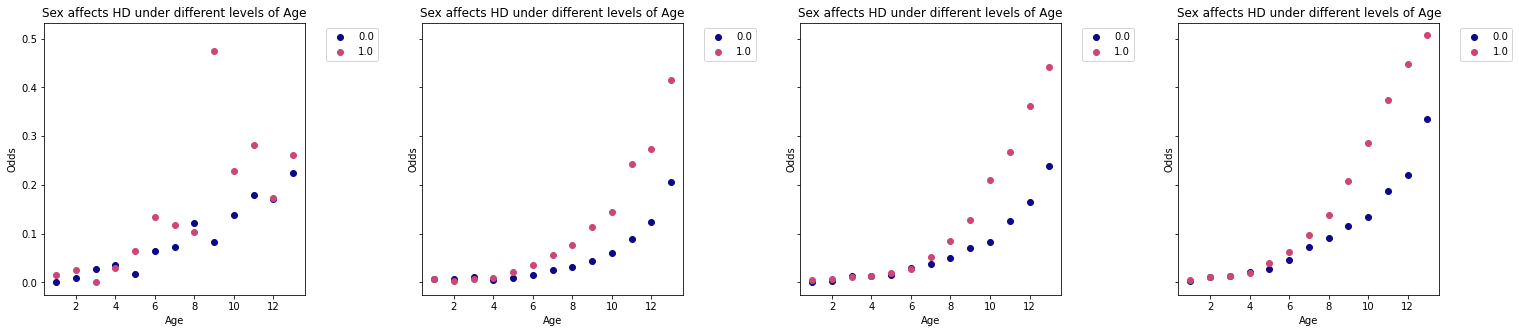

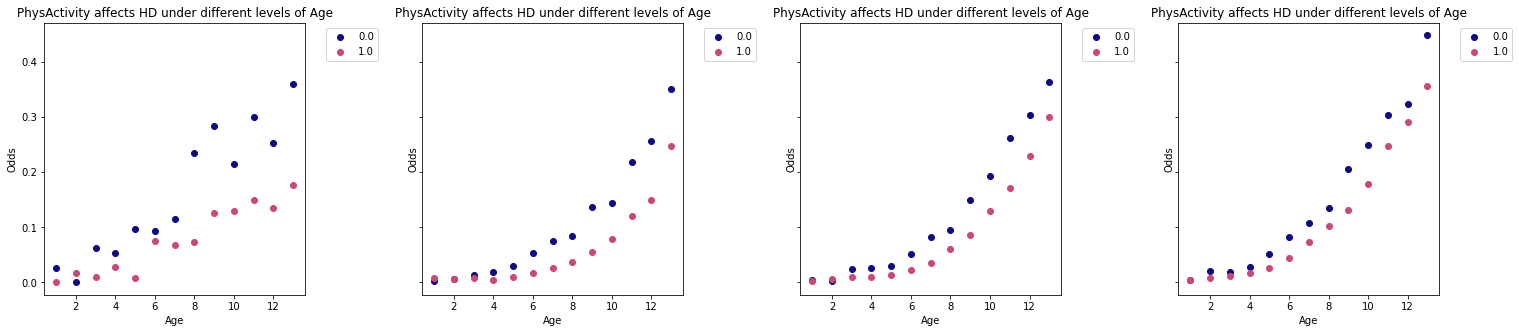

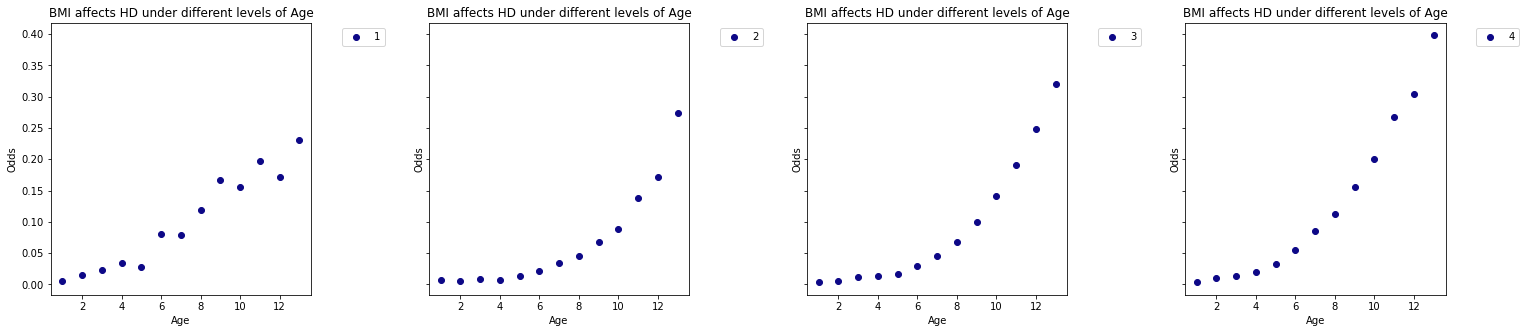

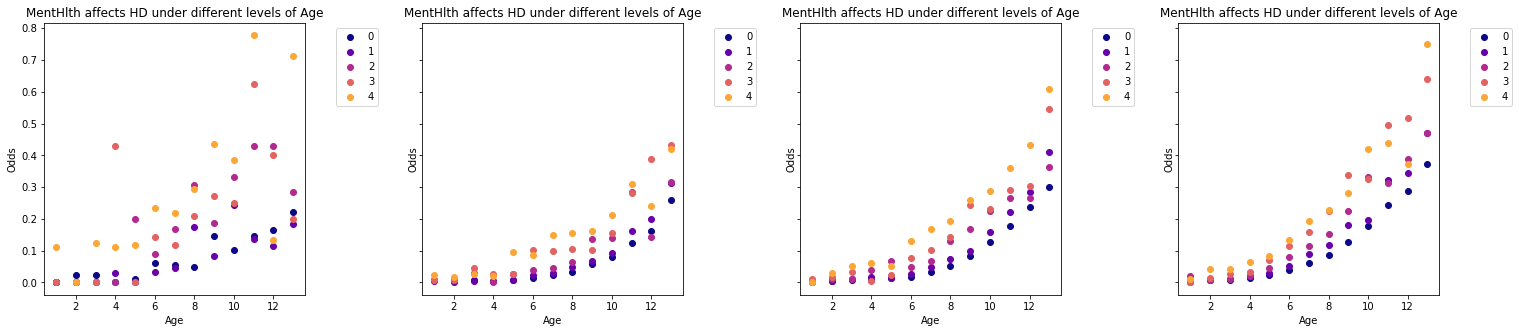

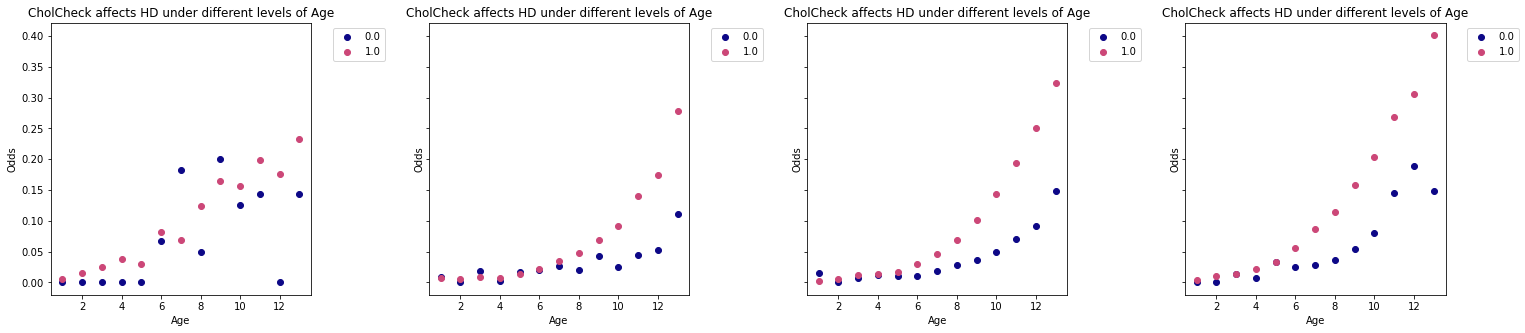

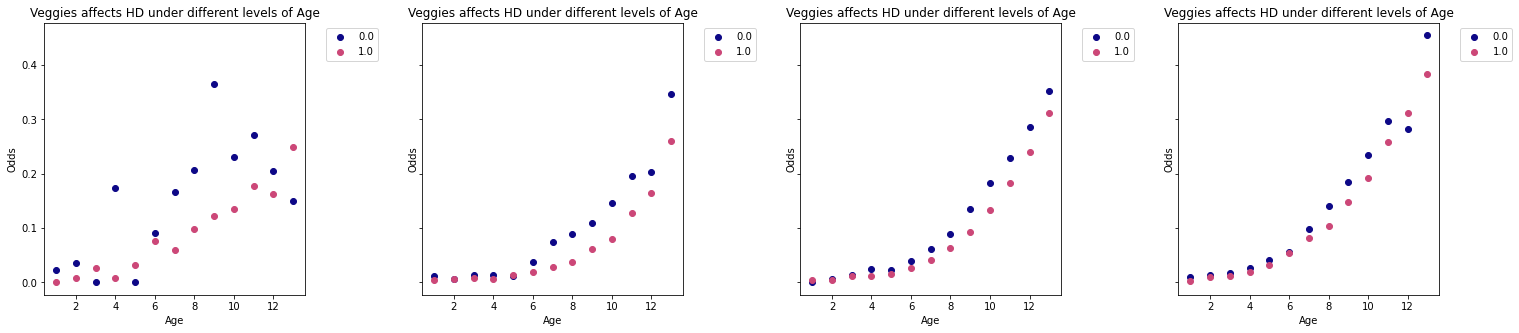

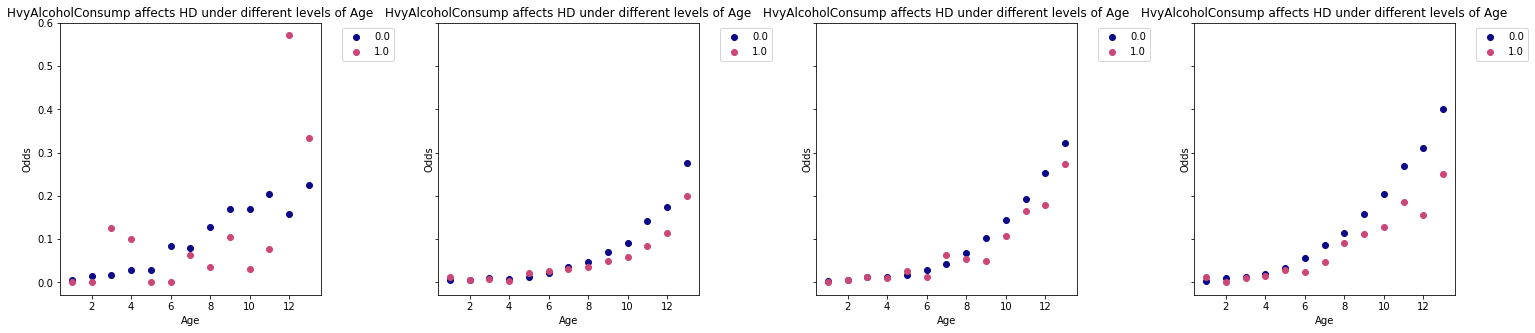

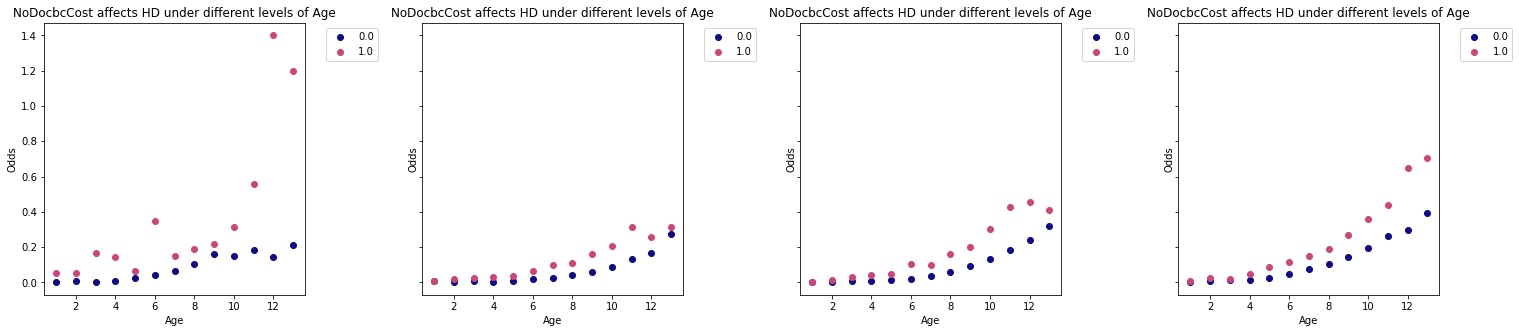

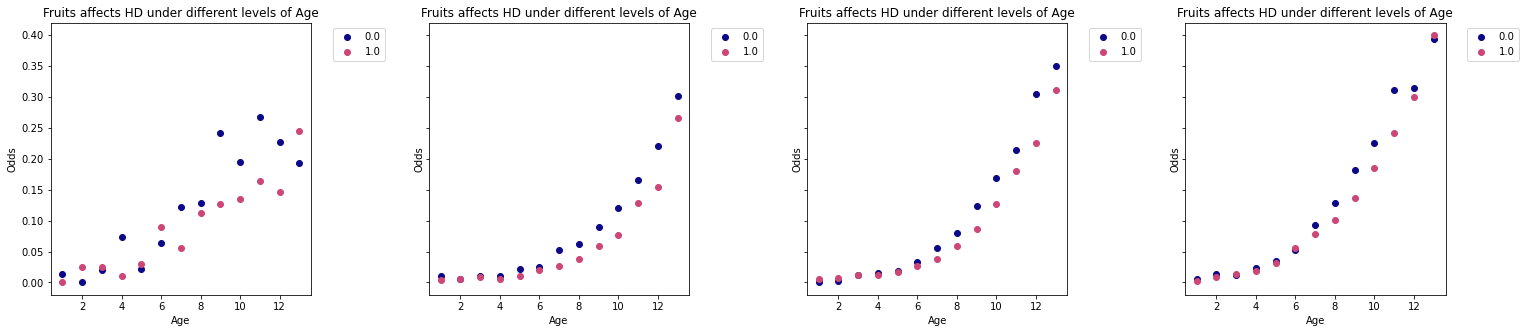

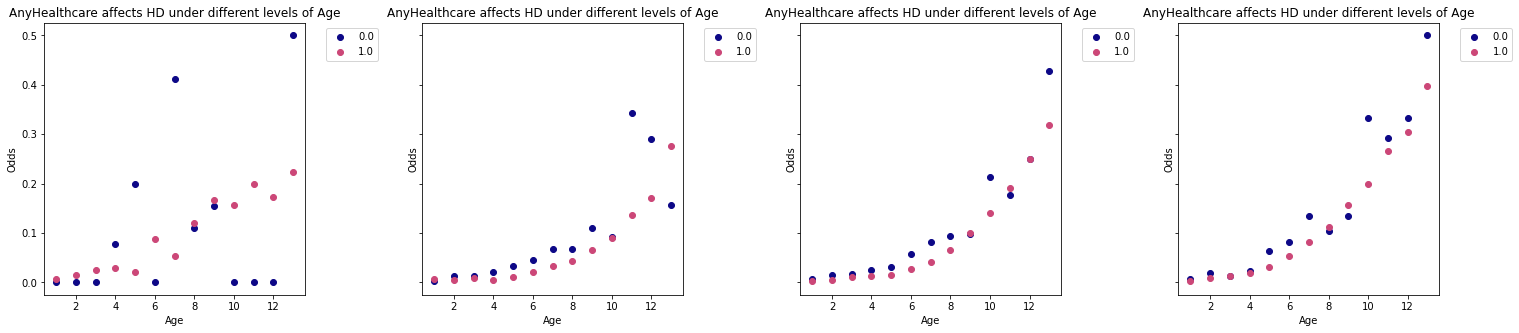

In [84]:
#low_entropy_var = ['GenHlth','Education','CholCheck','Income','AnyHealthcare','HighBP','Veggies','HighChol','DiffWalk','Age']
for feature in remain_entropy_var:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 5), gridspec_kw={'wspace': 0.45, 'hspace': 0.45}, sharey=True)
    

    # Call the function for each subplot
    odds_trend_Age(feature, Underweight_df, ax1)
    odds_trend_Age(feature, Normalweight_df, ax2)
    odds_trend_Age(feature, Overweight_df, ax3)
    odds_trend_Age(feature, Obesity_df, ax4)

    # Adjust the overlap between the subplots
    plt.subplots_adjust(wspace=0.4)

    # Display the plots
    plt.show()


In [43]:


def odds_trend_BMI(feature, dataframe, ax):
    df = dataframe.copy()
    table = pd.crosstab(df['BMI'], [df[feature], df['HeartDiseaseorAttack']], margins=False)
    age = np.arange(1, 14)
    # Create a color map that maps each feature to a unique color
    color_map = plt.get_cmap('plasma')
    
    # Loop over each level of GenHlth and plot the data for that level
    for i, level in enumerate(sorted(df[feature].unique())):
        temp = table.loc[:,level][1] / table.loc[:,level][0] 
        # Create the data for the dot plot
        color = color_map(i / df[feature].unique().shape[0])
        ax.scatter(age, temp.values, marker='o', color=color, label=level)

    # Add a legend to the plot
    ax.legend(bbox_to_anchor=(1.2, 1))
    # Add labels and title
    ax.set_xlabel('BMI')
    ax.set_ylabel('Odds')
    ax.set_title( feature + ' affects HD under different levels of BMI')


In [52]:
pd.crosstab(df_copy['BMI'], [df_copy[feature], df_copy['HeartDiseaseorAttack']], margins=False)

GenHlth                 1.0         2.0          3.0          4.0         5.0  \
HeartDiseaseorAttack    0.0  1.0    0.0   1.0    0.0   1.0    0.0   1.0   0.0   
BMI                                                                             
1                       627   12    841    34    710    90    380    85   238   
2                     19291  307  24565   972  13889  1508   4735  1176  1754   
3                     17249  446  34448  1803  23687  2974   7402  2230  2249   
4                      7116  251  25102  1319  29446  3342  12325  3237  3733   

GenHlth                     
HeartDiseaseorAttack   1.0  
BMI                         
1                      110  
2                      756  
3                     1261  
4                     1980

In [41]:
# group the data by gender
grouped = df_copy.groupby('BMI')

# create a new DataFrame for each group
Underweight_df = grouped.get_group(1)
Normalweight_df = grouped.get_group(2)
Overweight_df = grouped.get_group(3)
Obesity_df = grouped.get_group(4)

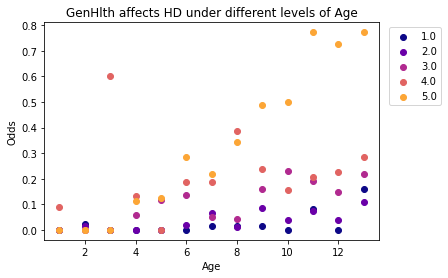

In [51]:
fig, ax1 = plt.subplots()
odds_trend_Age('GenHlth', Underweight_df, ax1)

## HeartDiseaseorAttack + Stroke

In [33]:
df['HD_Stroke'].value_counts()

0    223432
2     19956
1      6355
3      3937
Name: HD_Stroke, dtype: int64

In [6]:
def two_way_Combin(var1,var2):
    new_combin_names = var1 + "+" + var2 
    df_copy = df.copy()
    df_copy[new_combin_names] = df_copy[var1].astype(str) + "," +  df_copy[var2].astype(str)
    # Move last column to the first
    #temp_cols=df.columns.tolist()
    #new_cols=temp_cols[-1:] + temp_cols[:-1]
    #df1 = df[new_cols]
    
    # rename the elements as number in new column we create
    df_copy[new_combin_names] = df_copy[new_combin_names].astype('category')
    df_copy[new_combin_names] = df_copy[new_combin_names].cat.codes
    df_copy = df_copy.drop(columns=[var1, var2])
    
    return df_copy

In [7]:
df_HD_Stroke = two_way_Combin('HeartDiseaseorAttack','Stroke')


In [8]:
df_HD_Stroke

,HighBP,HighChol,CholCheck,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack+Stroke
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0
3,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,0
253676,1.0,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,0
253677,0.0,0.0,1.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,0


In [9]:
df2['HeartDiseaseorAttack_Stroke']

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    0
253677    0
253678    0
253679    2
Name: HeartDiseaseorAttack_Stroke, Length: 253680, dtype: int8

In [10]:
table = pd.crosstab(df2['HeartDiseaseorAttack_Stroke'],df2['GenHlth'],margins = False)
table


GenHlth,1.0,2.0,3.0,4.0,5.0
HeartDiseaseorAttack_Stroke,,,,,
0,43929,83666,65579,23160,7098
1,354,1290,2153,1682,876
2,925,3754,6894,5431,2952
3,91,374,1020,1297,1155


In [104]:
pd.DataFrame(sorted_entropy)

,0,1
0,HeartDiseaseorAttack_Stroke,0.000000
1,GenHlth,0.617411
2,Age,0.626956
3,HighBP,0.637300
4,DiffWalk,0.639851
5,PhysHlth,0.647888
6,HighChol,0.649680
7,Income,0.654335
8,Diabetes,0.654371
9,Smoker,0.665682


In [ ]:

for i in range(len(df)):
    if(pd.unique(df['GenHlth'])[i]==1 and df['Stroke'][i]==1):
        HD_stroke_list.append('(+,+)')
    elif(df['HeartDiseaseorAttack'][i]==1 and df['Stroke'][i]==0):
        HD_stroke_list.append('(+,-)')
    elif(df['HeartDiseaseorAttack'][i]==0 and df['Stroke'][i]==1):
        HD_stroke_list.append('(-,+)')
    else:
        HD_stroke_list.append('(-,-)')
